In [1]:
import pandas as pd, scipy.stats as stats, seaborn as sns, matplotlib.pyplot as plt
import ast

url = "https://raw.githubusercontent.com/nkmwicz/worldcup2018data/refs/heads/main/cleaned_events_world_cup2018.csv"

df = pd.read_csv(url)
df['tags'] = df['tags'].apply(ast.literal_eval)
print(ast.literal_eval)
df.head()

<function literal_eval at 0x000001EC4A23E5C0>


,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0


In [7]:
# function to return win, loss, tie
def get_outcome(row):
    matchId = row['matchId']
    teamId = row['teamId']
    
    teams, scores = matchId.split(",")
    home, away = teams.split("-")
    home_score, away_score = scores.split("-")
    away_score = away_score.split("(")[0]    
    home_score = int(home_score)
    away_score = int(away_score)
    if home_score == away_score:
        return "tie"
    if home_score > away_score:
        if home.strip().lower() == teamId.strip().lower():
            return "win" 
        else:
            return "loss"
    else:
        if away.strip().lower() == teamId.strip().lower():
            return "win" 
        else:
            return "loss"
    
df['outcome'] = df[['matchId', "teamId"]].apply(get_outcome, axis=1)
df.head()

,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,outcome
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,loss
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,loss
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0,win
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0,loss
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0,loss


In [ ]:
df['pass_a3'] = False
df.loc[
    (df['eventName'] == "Pass") 
    & (df['x1'] > 66) 
    & (df['x2'] > df['x1'])
    & (pd.Series("Accurate").isin(df["tags"])),
    "pass_a3"] = True

ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
df['tags'].includes

0    False
dtype: bool

In [25]:
df.head()

,eventId,subEventName,tags,playerId,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x1,y1,x2,y2,outcome,pass_a3
0,8,Simple pass,[Accurate],Mohammad Ibrahim Al Sahlawi,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,1.656214,Simple pass,258612104,50,50,35.0,53.0,loss,False
1,8,High pass,[Accurate],Abdullah Ibrahim Otayf,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,4.487814,High pass,258612106,35,53,75.0,19.0,loss,False
2,1,Air duel,"[Won, Accurate]",Ilya Kutepov,"Russia - Saudi Arabia, 5 - 0",Duel,Russia,1H,5.937411,Air duel,258612077,25,81,37.0,83.0,win,False
3,1,Air duel,"[Lost, Not accurate]",Yasir Gharsan Al Shahrani,"Russia - Saudi Arabia, 5 - 0",Duel,Saudi Arabia,1H,6.406961,Air duel,258612112,75,19,63.0,17.0,loss,False
4,8,Simple pass,[Accurate],Salman Mohammed Al Faraj,"Russia - Saudi Arabia, 5 - 0",Pass,Saudi Arabia,1H,8.562167,Simple pass,258612110,63,17,71.0,15.0,loss,False


In [26]:
group_df = df.groupby(['matchId', 'teamId']).agg(
    passes=("pass_a3", "sum"),
    outcome=("outcome", "first"),
).reset_index()
group_df

,matchId,teamId,passes,outcome
0,"Argentina - Croatia, 0 - 3",Argentina,0,loss
1,"Argentina - Croatia, 0 - 3",Croatia,0,win
2,"Argentina - Iceland, 1 - 1",Argentina,0,tie
3,"Argentina - Iceland, 1 - 1",Iceland,0,tie
4,"Australia - Peru, 0 - 2",Australia,0,loss
...,...,...,...,...
123,"Uruguay - Portugal, 2 - 1",Uruguay,0,win
124,"Uruguay - Russia, 3 - 0",Russia,0,loss
125,"Uruguay - Russia, 3 - 0",Uruguay,0,win
126,"Uruguay - Saudi Arabia, 1 - 0",Saudi Arabia,0,loss


<Axes: xlabel='outcome', ylabel='passes'>

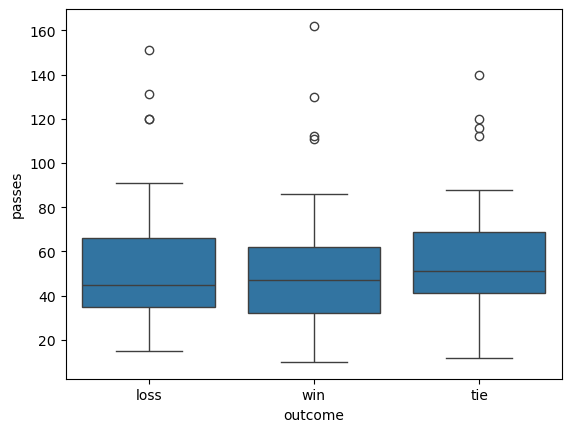

In [12]:
sns.boxplot(data=group_df, y="passes", x="outcome")

In [14]:
u_outcomes = group_df['outcome'].unique() # ["win", "loss", "tie"]
values_list = [group_df.loc[group_df['outcome']==outcome, "passes"] for outcome in u_outcomes]
# values_list

In [15]:
f, p = stats.f_oneway(*values_list)
print(f"f={f:.2f}, p={p:.2f}")

f=0.41, p=0.67
